# Developing a model for predicting fraudulent transactions for a financial company

**LOADING LIBRARIES**

In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

**IMPORTING DATASET**

In [86]:
df=pd.read_csv(r"C:\Users\hp\Downloads\Fraud.csv")
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [87]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [88]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [89]:
df.shape

(6362620, 11)

In [90]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

**Dataset having 6362620 rows and 11 columns**
**step** - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).<br>
**type** - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.<br>
**amount** - amount of the transaction in local currency.<br>
**nameOrig** - customer who started the transaction<br>
**oldbalanceOrg** - initial balance before the transaction<br>
**newbalanceOrig** - new balance after the transaction<br>
**nameDest** - customer who is the recipient of the transaction<br>
**oldbalanceDest** - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).<br>
**newbalanceDest** - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).<br>
**isFraud** - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.<br>
**isFlaggedFraud** - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

**EXPLORATORY DATA ANALYSIS**

In [93]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


This is a really big dataset with no NULL values having size over 500MB. This would take some time to train for a normal GPU.<br>
DATATYPES OF COLUMNS: float64(5), int64(3), object(3)

In [96]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


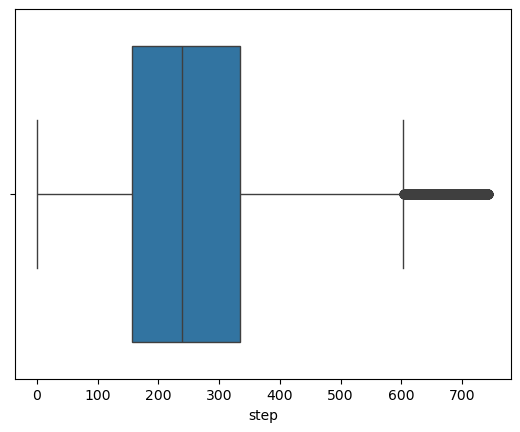

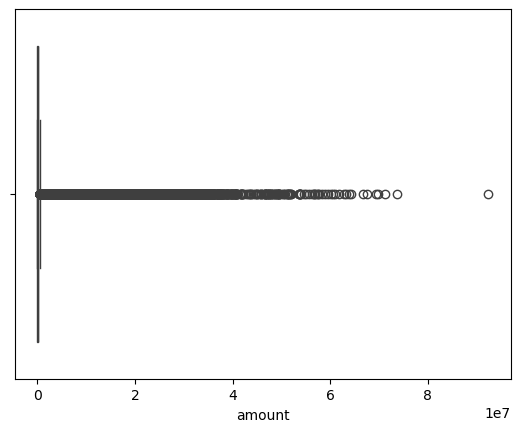

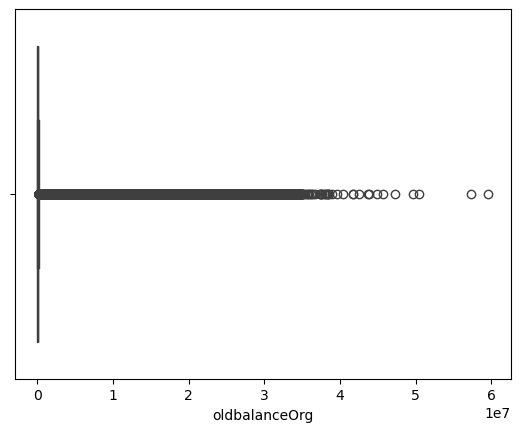

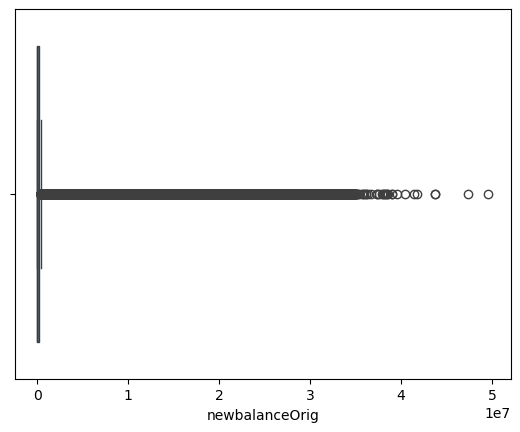

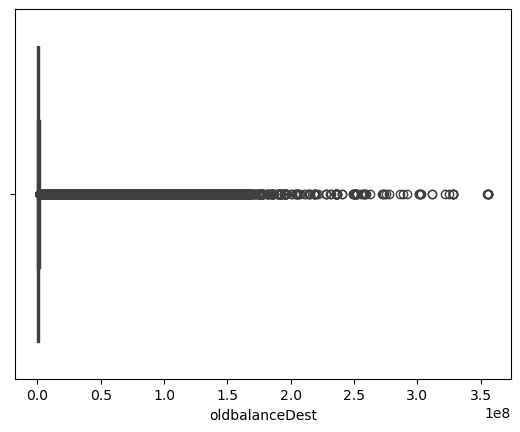

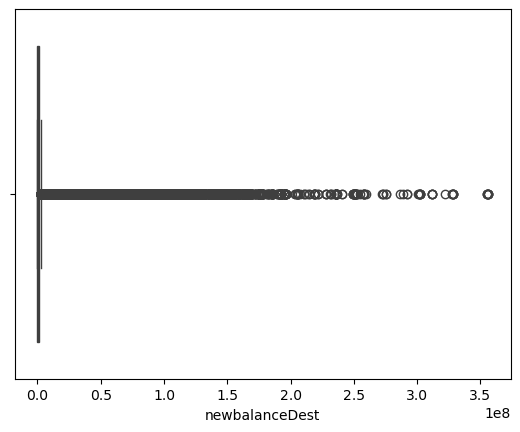

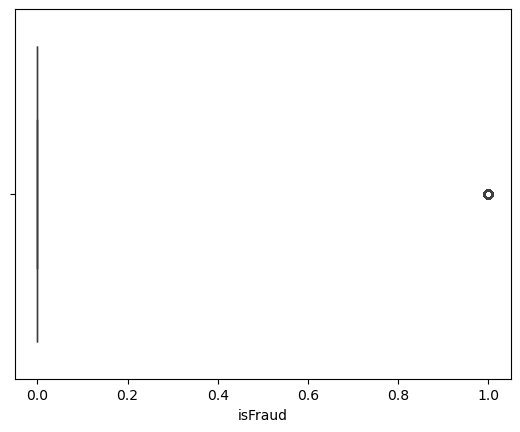

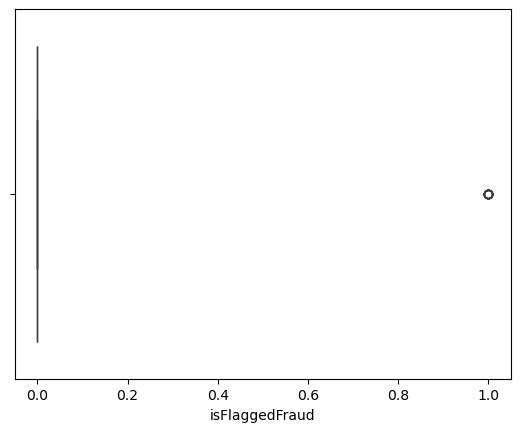

In [97]:
for col in df.columns:
    if df[col].dtype!='object':
        sns.boxplot(data=df,x=col)
        plt.show()

**REMOVING OUTLIERS**

In [99]:
outliers_col=['step','oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
for i in outliers_col:
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    IQR=q3-q1
    UL=q3+1.5*IQR
    LL=q1-1.5*IQR
    df=df[(df[i]>=LL)&(df[i]<=UL)]

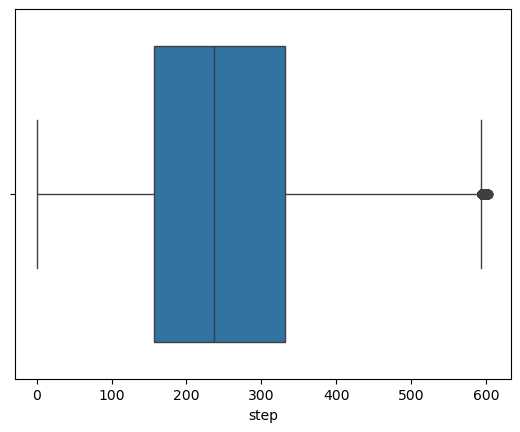

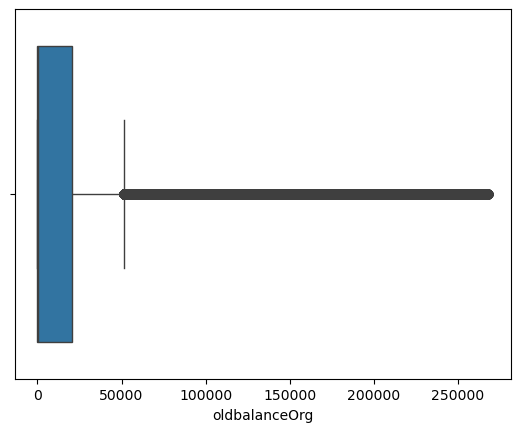

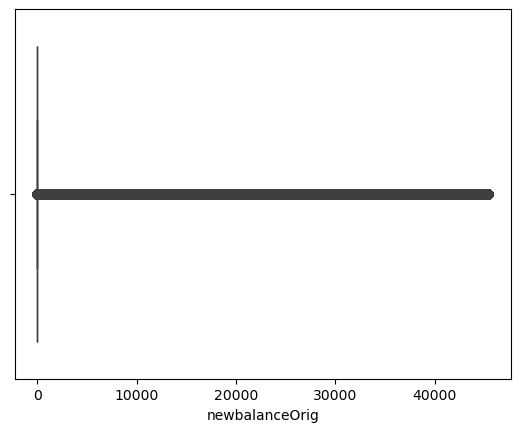

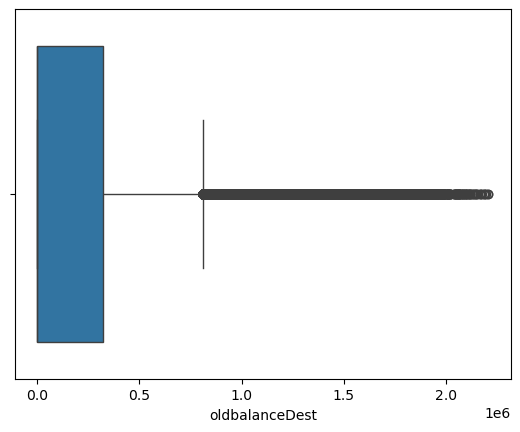

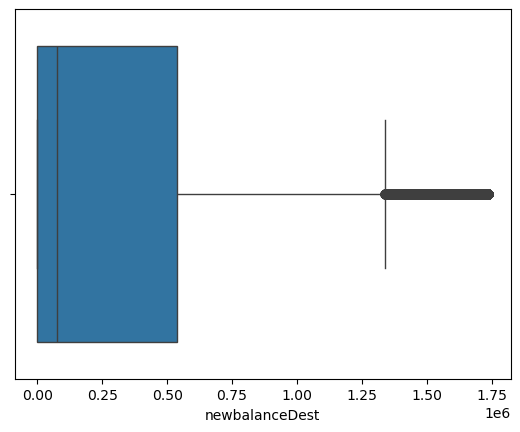

In [100]:
#RECHECKING OUTLIERS
for i in outliers_col:
    if df[i].dtype!='object':
        sns.boxplot(data=df,x=i)
        plt.show()


In [101]:
legit = len(df[df.isFraud == 0])
fraud = len(df[df.isFraud == 1])
legit_percent = (legit / (fraud + legit)) * 100
fraud_percent = (fraud / (fraud + legit)) * 100

print("Number of Legit transactions: ", legit)
print("Number of Fraud transactions: ", fraud)
print("Percentage of Legit transactions: {:.4f} %".format(legit_percent))
print("Percentage of Fraud transactions: {:.4f} %".format(fraud_percent))

Number of Legit transactions:  3374757
Number of Fraud transactions:  2431
Percentage of Legit transactions: 99.9280 %
Percentage of Fraud transactions: 0.0720 %


These results prove that this is a highly unbalanced data as Percentage of Legit transactions= 99.87 % and Percentage of Fraud transactions= 0.13 %. 
SO DECISION TREES AND RANDOM FORESTS ARE GOOD METHODS FOR IMBALANCED DATA.

**VISUALISATION**

<Axes: xlabel='type', ylabel='count'>

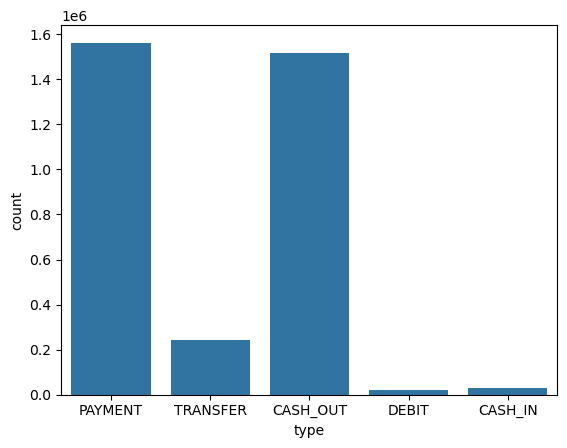

In [104]:
#Count plot of the Payment type column
sns.countplot(x='type', data=df)

<Axes: xlabel='type', ylabel='amount'>

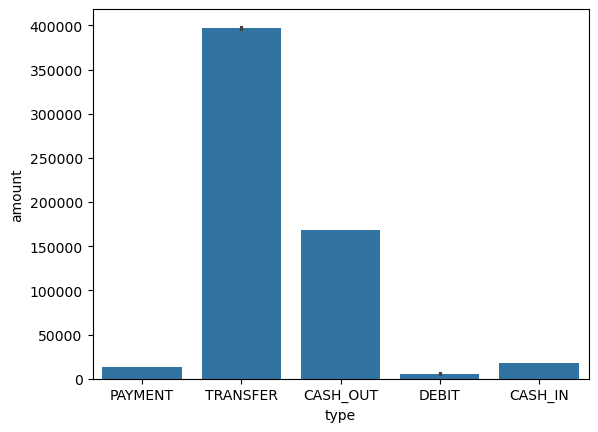

In [105]:
#analyzing Type and amount column simultaneously
sns.barplot(x='type', y='amount', data=df)

C:\Users\hp\AppData\Local\Temp\ipykernel_17652\2346559149.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['step'], bins=50)


<Axes: xlabel='step', ylabel='Density'>

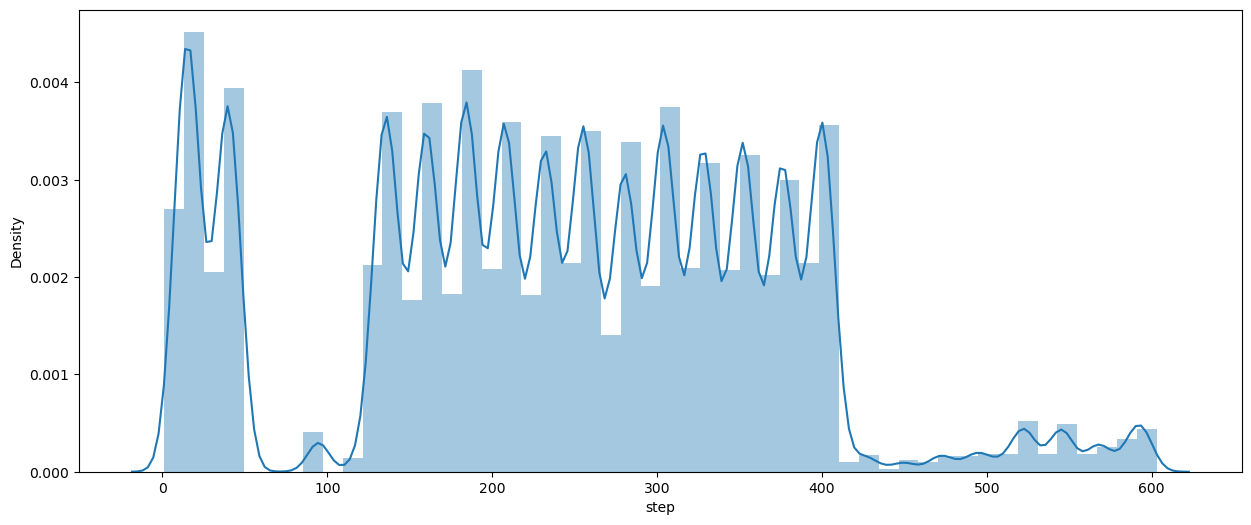

In [106]:
#the distribution of the step column using distplot
plt.figure(figsize=(15, 6))
sns.distplot(df['step'], bins=50)

The graph shows the maximum distribution among 200 to 400 of step

<Axes: >

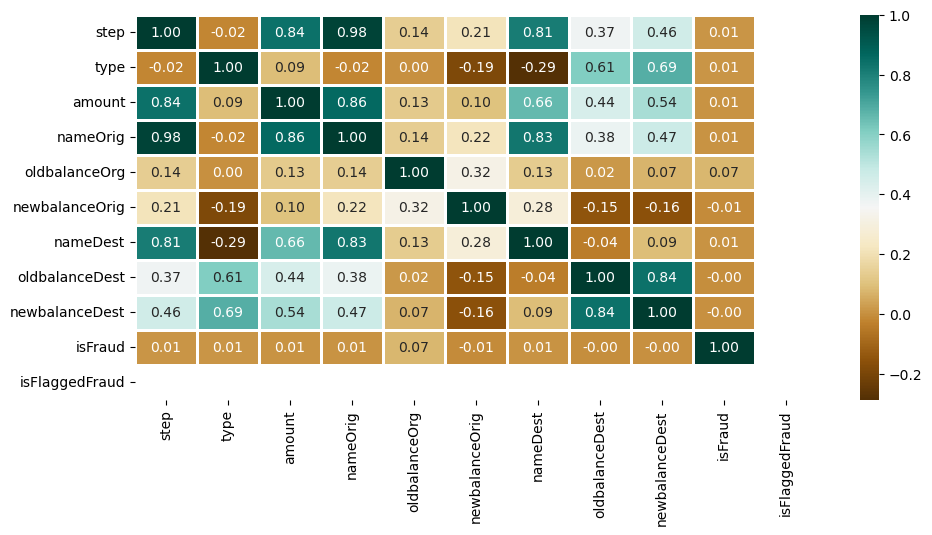

In [108]:
plt.figure(figsize=(11,5))
sns.heatmap(df.apply(lambda x: pd.factorize(x)[0]).corr(),cmap='BrBG',fmt='.2f',linewidths=2,annot=True)

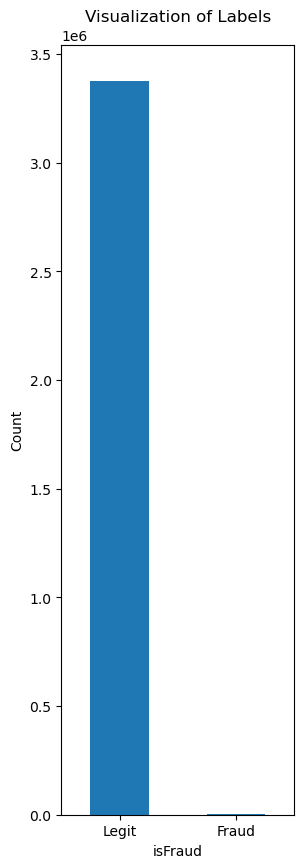

In [109]:
#NUMBER OF LEGIT AND FRAUD TRANSACTIONS
plt.figure(figsize=(3,10))
labels = ["Legit", "Fraud"]
count_classes = df.value_counts(df['isFraud'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

**ENCODING**

In [111]:
#creating a copy of original dataset to train and test models
new_df=df.copy()
new_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.0,0.00,M1176932104,0.0,0.0,0,0


In [112]:
#LABEL ENCODING
# Checking how many attributes are dtype: object

obj= new_df.select_dtypes(include = "object").columns
print (obj)

Index(['type', 'nameOrig', 'nameDest'], dtype='object')


THERE ARE 3 ATTRIBUTES WITH Object Datatype. THUS WE NEED TO LABEL ENCODE THEM IN ORDER TO CHECK MULTICOLINEARITY.

In [114]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for f in obj:
    new_df[f] = le.fit_transform(new_df[f].astype(str))
new_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3377188 entries, 1 to 6259931
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int32  
 2   amount          float64
 3   nameOrig        int32  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int32  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int32(3), int64(3)
memory usage: 270.5 MB


In [115]:
#MULTICOLINEARITY
# Import library for VIF (VARIANCE INFLATION FACTOR)

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(df):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

    return(vif)

calc_vif(new_df)

C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,variables,VIF
0,step,3.338367
1,type,6.786620
2,amount,12.057764
3,nameOrig,3.195298
4,oldbalanceOrg,1.552886
5,newbalanceOrig,1.403214
6,nameDest,4.922152
7,oldbalanceDest,47.370842
8,newbalanceDest,77.225997
9,isFraud,1.010826


We can see that oldbalanceOrg and newbalanceOrig have too high VIF thus they are highly correlated. Similarly oldbalanceDest and newbalanceDest. Also nameDest is connected to nameOrig.

Thus combine these pairs of collinear attributes and drop the individual ones.

In [117]:
new_df['Actual_amount_orig'] = new_df.apply(lambda x: x['oldbalanceOrg'] - x['newbalanceOrig'],axis=1)
new_df['Actual_amount_dest'] = new_df.apply(lambda x: x['oldbalanceDest'] - x['newbalanceDest'],axis=1)
new_df['TransactionPath'] = new_df.apply(lambda x: x['nameOrig'] + x['nameDest'],axis=1)

#Dropping columns
new_df = new_df.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','step','nameOrig','nameDest'],axis=1)

calc_vif(new_df)

C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,variables,VIF
0,type,4.108558
1,amount,11.661313
2,isFraud,1.009250
3,isFlaggedFraud,NaN
4,Actual_amount_orig,1.291129
5,Actual_amount_dest,10.891878
6,TransactionPath,4.039548


<Axes: >

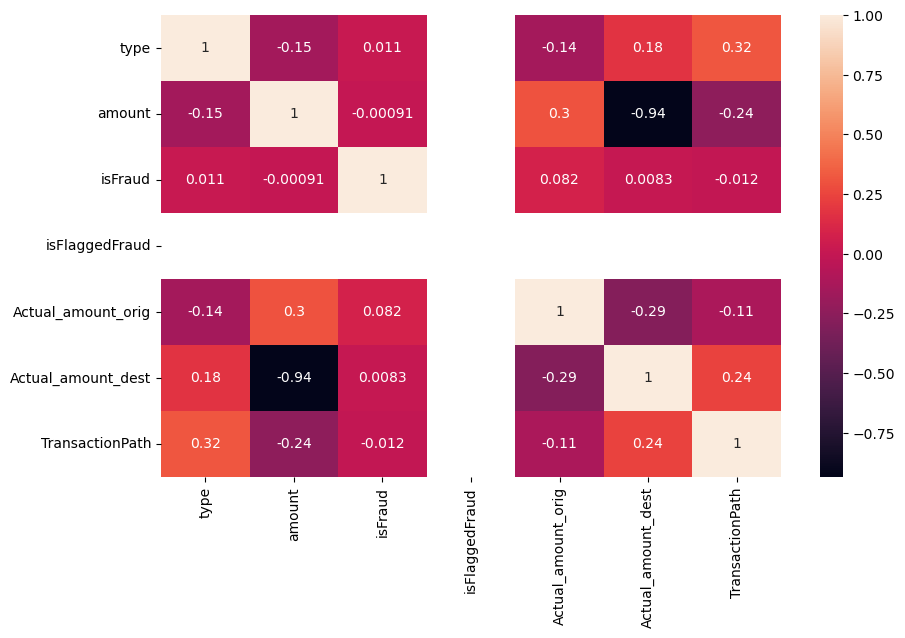

In [118]:
corr=new_df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

How did you select variables to be included in the model?
Using the VIF values and correlation heatmap. We just need to check if there are any two attributes highly correlated to each other and then drop the one which is less correlated to the isFraud Attribute.

**MODEL BUILDING**

In [121]:
from sklearn.tree import DecisionTreeClassifier
import itertools
from collections import Counter
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [122]:
#NORMALIZING (SCALING) AMOUNT
# Perform Scaling
scaler = StandardScaler()
new_df["NormalizedAmount"] = scaler.fit_transform(new_df["amount"].values.reshape(-1, 1))
new_df.drop(["amount"], inplace= True, axis= 1)

Y = new_df["isFraud"]
X = new_df.drop(["isFraud"], axis= 1)

I did not normalize the complete dataset because it may lead to decrease in accuracy of model.

**TRAIN-TEST SPLIT**


In [125]:
# Split the data
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size= 0.3, random_state= 42)

print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)


Shape of X_train:  (2364031, 6)
Shape of X_test:  (1013157, 6)


**EVALUATION**

In [ ]:
# DECISION TREE

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

Y_pred_dt = decision_tree.predict(X_test)
decision_tree_score = decision_tree.score(X_test, Y_test) * 100
# RANDOM FOREST

random_forest = RandomForestClassifier(n_estimators= 100)
random_forest.fit(X_train, Y_train)

Y_pred_rf = random_forest.predict(X_test)
random_forest_score = random_forest.score(X_test, Y_test) * 100

In [ ]:

# Print scores of our classifiers

print("Decision Tree Score: ", decision_tree_score)
print("Random Forest Score: ", random_forest_score)

print("TP,FP,TN,FN - Decision Tree")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_dt).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

print("----------------------------------------------------------------------------------------")

# key terms of Confusion Matrix - RF

print("TP,FP,TN,FN - Random Forest")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_rf).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

TP(Decision Tree) ~ TP(Random Forest) so no competetion here.<BR>
FP(Decision Tree) >> FP(Random Forest) - Random Forest has an edge<br>
TN(Decision Tree) < TN(Random Forest) - Random Forest is better here too
FN(Decision Tree) ~ FN(Random Forest)

In [ ]:
#Here Random Forest looks good.

# confusion matrix - DT

confusion_matrix_dt = confusion_matrix(Y_test, Y_pred_dt.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt,)

print("----------------------------------------------------------------------------------------")

# confusion matrix - RF

confusion_matrix_rf = confusion_matrix(Y_test, Y_pred_rf.round())
print("Confusion Matrix - Random Forest")
print(confusion_matrix_rf)

In [ ]:
#With Such a good precision and hence F1-Score, Random Forest comes out to be better as expected.

# visualising confusion matrix - DT


disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_dt)
disp.plot()
plt.title('Confusion Matrix - DT')
plt.show()

# visualising confusion matrix - RF
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_rf)
disp.plot()
plt.title('Confusion Matrix - RF')
plt.show()

In [ ]:
# AUC ROC - DT
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(Y_test, Y_pred_dt)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - DT')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# AUC ROC - RF
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(Y_test, Y_pred_rf)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - RF')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

THE AUC for both Decision Tree and Random Forest is equal, so both models are pretty good at what they do.<br><br>

**CONCLUSION**

We have seen that Accuracy of both Random Forest and Decision Tree is equal, although teh precision of Random Forest is more. In a fraud detection model, Precision is highly important because rather than predicting normal transactions correctly we want Fraud transactions to be predicted correctly and Legit to be left off.If either of the 2 reasons are not fulfiiled we may catch the innocent and leave the culprit.<br>
This is also one of the reason why Random Forest and Decision Tree are used unstead of other algorithms.<br><br>


Also the reason I have chosen this model is because of highly unbalanced dataset (Legit: Fraud :: 99.87:0.13). Random forest makes multiple decision trees which makes it easier (although time taking) for model to understand the data in a simpler way since Decision Tree makes decisions in a boolean way.<br><br>


Models like XGBoost, Bagging, ANN, and Logistic Regression may give good accuracy but they won't give good precision and recall values.<br><br>

What are the key factors that predict fraudulent customer?<br>
<ul>
The source of request is secured or not ?<br>
Is the name of organisation asking for money is legit or not ?<br>
Transaction history of vendors.<br>
What kind of prevention should be adopted while company update its infrastructure?<br>
<br>
Use smart vertified apps only.<br>
Browse through secured websites.<br>
Use secured internet connections (USE VPN).<br>
Keep your mobile and laptop security updated.<br>
Don't respond to unsolicited calls/SMS(s/E-mails.<br>
If you feel like you have been tricked or security compromised, contact your bank immidiately.<br>
Assuming these actions have been implemented, how would you determine if they work?<br><br>
</ul>
Bank sending E-statements.<br>
Customers keeping a check of their account activity.<br>
Always keep a log of your payments.<br>

** What Are the Key Factors That Predict Fraudulent Customers?**<br><br>
Transaction Amount: Unusually large transactions are often associated with fraud.<br>
Frequency of Transactions: A sudden spike in transaction frequency can be indicative of fraud.<br>
Customer Behavior: If the customer’s transaction patterns deviate from their usual behavior (e.g., geographical location, purchase category), it might signal fraud.
<br>
Account Age: Newer accounts might be more likely to be involved in fraudulent activities.<br>
IP Address and Location: Geographical mismatches or high-risk countries can be red flags.<br>
Velocity of Transactions: Multiple transactions in a short period can be a sign of fraud.<br>
<br>
**Do These Factors Make Sense? If Yes, How? If Not, How Not?**<br>
Yes: These factors make sense because they align with common fraud detection heuristics and are consistent with the behavior of fraudsters. Fraudulent activity often involves unusual or out-of-pattern behavior such as:
<br>
Large or frequent transactions
<br>
Transactions from different geographical locations in short time spans
<br>
Sudden changes in spending behavior<br>

No: If any of these factors didn’t make sense, they could be due to a lack of domain expertise or inaccurate data. For example, if the model falsely flags frequent but legitimate transactions as fraud, there may be overfitting or irrelevant features influencing the model.
<br><br>
**What Kind of Prevention Should Be Adopted While Company Updates Its Infrastructure?**<br><br>
Data Security: Use encryption techniques for data in transit and at rest to prevent unauthorized access to sensitive customer information.<br>
Fraud Detection Integration: Incorporate fraud detection systems into the company’s infrastructure to identify suspicious transactions in real-time.<br>
Regular Monitoring: Implement automated monitoring systems to continuously assess risk.<br>
Multi-Factor Authentication (MFA): Require multi-factor authentication to prevent unauthorized access to accounts.<br>
Machine Learning Updates: Regularly update the fraud detection models with fresh data and retrain them to capture evolving fraudulent tactics.<br><br>

**Assuming These Actions Have Been Implemented, How Would You Determine If They Work?**<br><br>
Continuous Model Evaluation: Track the performance of the fraud detection model post-implementation using metrics like Precision, Recall, False Positive Rate, and True Positive Rate.
<br>
Test A/B Experiment: Conduct A/B testing by comparing the performance of the updated fraud detection model with the previous one.
<br>
Fraudulent Activity Trends: Monitor any decline in fraudulent transactions over time and compare it to baseline rates.
<br>
Customer Feedback: Analyze customer complaints to ensure legitimate transactions are not incorrectly flagged as fraudulent.
<br>
Fraud Recovery Rate: Measure the success rate of identifying and recovering fraudulent transactions before they result in significant losses.